## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9671451	total: 59.5ms	remaining: 59.4s
1:	learn: 0.9472540	total: 60.5ms	remaining: 30.2s
2:	learn: 0.9264491	total: 61.5ms	remaining: 20.4s
3:	learn: 0.9106831	total: 62.6ms	remaining: 15.6s
4:	learn: 0.8931814	total: 63.5ms	remaining: 12.6s
5:	learn: 0.8796369	total: 64.6ms	remaining: 10.7s
6:	learn: 0.8622665	total: 65.5ms	remaining: 9.29s
7:	learn: 0.8458380	total: 66.5ms	remaining: 8.25s
8:	learn: 0.8313578	total: 67.5ms	remaining: 7.43s
9:	learn: 0.8144317	total: 68.4ms	remaining: 6.77s
10:	learn: 0.7988475	total: 69.3ms	remaining: 6.23s
11:	learn: 0.7848933	total: 70.2ms	remaining: 5.78s
12:	learn: 0.7705260	total: 71.1ms	remaining: 5.4s
13:	learn: 0.7562535	total: 72ms	remaining: 5.07s
14:	learn: 0.7423437	total: 72.8ms	remaining: 4.78s
15:	learn: 0.7297483	total: 73.6ms	remaining: 4.53s
16:	learn: 0.7162472	total: 74.4ms	remaining: 4.3s
17:	learn: 0.7034387	total: 75.3ms	remaining: 4.11s
18:	learn: 0.6910400	total: 76.1ms	remaining: 3.

54:	learn: 0.4287953	total: 107ms	remaining: 1.84s
55:	learn: 0.4254237	total: 108ms	remaining: 1.82s
56:	learn: 0.4214115	total: 110ms	remaining: 1.81s
57:	learn: 0.4170802	total: 110ms	remaining: 1.79s
58:	learn: 0.4138736	total: 111ms	remaining: 1.77s
59:	learn: 0.4097974	total: 112ms	remaining: 1.75s
60:	learn: 0.4057893	total: 113ms	remaining: 1.73s
61:	learn: 0.4016041	total: 113ms	remaining: 1.72s
62:	learn: 0.3986799	total: 114ms	remaining: 1.7s
63:	learn: 0.3949225	total: 115ms	remaining: 1.68s
64:	learn: 0.3914492	total: 116ms	remaining: 1.67s
65:	learn: 0.3879652	total: 117ms	remaining: 1.65s
66:	learn: 0.3849708	total: 118ms	remaining: 1.64s
67:	learn: 0.3821708	total: 118ms	remaining: 1.62s
68:	learn: 0.3795871	total: 119ms	remaining: 1.61s
69:	learn: 0.3762574	total: 120ms	remaining: 1.59s
70:	learn: 0.3728635	total: 121ms	remaining: 1.58s
71:	learn: 0.3704212	total: 122ms	remaining: 1.57s
72:	learn: 0.3678627	total: 123ms	remaining: 1.56s
73:	learn: 0.3653253	total: 124m

156:	learn: 0.2534671	total: 192ms	remaining: 1.03s
157:	learn: 0.2525585	total: 193ms	remaining: 1.03s
158:	learn: 0.2513672	total: 194ms	remaining: 1.02s
159:	learn: 0.2507851	total: 194ms	remaining: 1.02s
160:	learn: 0.2500312	total: 195ms	remaining: 1.02s
161:	learn: 0.2493016	total: 196ms	remaining: 1.01s
162:	learn: 0.2486744	total: 197ms	remaining: 1.01s
163:	learn: 0.2479586	total: 198ms	remaining: 1.01s
164:	learn: 0.2475931	total: 198ms	remaining: 1s
165:	learn: 0.2471816	total: 199ms	remaining: 1s
166:	learn: 0.2463600	total: 200ms	remaining: 998ms
167:	learn: 0.2460450	total: 201ms	remaining: 995ms
168:	learn: 0.2458554	total: 201ms	remaining: 989ms
169:	learn: 0.2450342	total: 202ms	remaining: 986ms
170:	learn: 0.2442281	total: 203ms	remaining: 983ms
171:	learn: 0.2433880	total: 204ms	remaining: 980ms
172:	learn: 0.2424542	total: 205ms	remaining: 978ms
173:	learn: 0.2415748	total: 205ms	remaining: 975ms
174:	learn: 0.2407824	total: 206ms	remaining: 973ms
175:	learn: 0.2400

283:	learn: 0.1860620	total: 298ms	remaining: 750ms
284:	learn: 0.1858801	total: 299ms	remaining: 749ms
285:	learn: 0.1851595	total: 299ms	remaining: 747ms
286:	learn: 0.1847370	total: 300ms	remaining: 746ms
287:	learn: 0.1841829	total: 301ms	remaining: 744ms
288:	learn: 0.1834377	total: 302ms	remaining: 743ms
289:	learn: 0.1829654	total: 303ms	remaining: 741ms
290:	learn: 0.1827284	total: 304ms	remaining: 739ms
291:	learn: 0.1822324	total: 304ms	remaining: 738ms
292:	learn: 0.1820902	total: 305ms	remaining: 737ms
293:	learn: 0.1814969	total: 306ms	remaining: 735ms
294:	learn: 0.1808909	total: 307ms	remaining: 733ms
295:	learn: 0.1804813	total: 308ms	remaining: 732ms
296:	learn: 0.1800876	total: 309ms	remaining: 731ms
297:	learn: 0.1794470	total: 310ms	remaining: 729ms
298:	learn: 0.1791864	total: 310ms	remaining: 728ms
299:	learn: 0.1788313	total: 311ms	remaining: 726ms
300:	learn: 0.1783330	total: 312ms	remaining: 725ms
301:	learn: 0.1780214	total: 313ms	remaining: 723ms
302:	learn: 

385:	learn: 0.1498803	total: 382ms	remaining: 608ms
386:	learn: 0.1498241	total: 383ms	remaining: 607ms
387:	learn: 0.1496485	total: 384ms	remaining: 605ms
388:	learn: 0.1491455	total: 385ms	remaining: 604ms
389:	learn: 0.1487087	total: 386ms	remaining: 603ms
390:	learn: 0.1486197	total: 386ms	remaining: 602ms
391:	learn: 0.1481797	total: 387ms	remaining: 600ms
392:	learn: 0.1477731	total: 388ms	remaining: 599ms
393:	learn: 0.1472853	total: 389ms	remaining: 598ms
394:	learn: 0.1470456	total: 390ms	remaining: 597ms
395:	learn: 0.1467626	total: 390ms	remaining: 595ms
396:	learn: 0.1462469	total: 391ms	remaining: 594ms
397:	learn: 0.1461439	total: 392ms	remaining: 593ms
398:	learn: 0.1456603	total: 393ms	remaining: 592ms
399:	learn: 0.1452672	total: 394ms	remaining: 591ms
400:	learn: 0.1451700	total: 395ms	remaining: 589ms
401:	learn: 0.1450208	total: 395ms	remaining: 588ms
402:	learn: 0.1449563	total: 396ms	remaining: 587ms
403:	learn: 0.1447315	total: 397ms	remaining: 586ms
404:	learn: 

511:	learn: 0.1208940	total: 488ms	remaining: 465ms
512:	learn: 0.1205479	total: 489ms	remaining: 464ms
513:	learn: 0.1203361	total: 490ms	remaining: 463ms
514:	learn: 0.1199657	total: 491ms	remaining: 462ms
515:	learn: 0.1197038	total: 492ms	remaining: 461ms
516:	learn: 0.1195319	total: 493ms	remaining: 460ms
517:	learn: 0.1191596	total: 494ms	remaining: 459ms
518:	learn: 0.1188415	total: 494ms	remaining: 458ms
519:	learn: 0.1185504	total: 495ms	remaining: 457ms
520:	learn: 0.1183010	total: 496ms	remaining: 456ms
521:	learn: 0.1180098	total: 497ms	remaining: 455ms
522:	learn: 0.1177659	total: 498ms	remaining: 454ms
523:	learn: 0.1176170	total: 498ms	remaining: 453ms
524:	learn: 0.1173445	total: 499ms	remaining: 452ms
525:	learn: 0.1172908	total: 500ms	remaining: 451ms
526:	learn: 0.1169768	total: 501ms	remaining: 450ms
527:	learn: 0.1167508	total: 502ms	remaining: 448ms
528:	learn: 0.1164960	total: 502ms	remaining: 447ms
529:	learn: 0.1162466	total: 503ms	remaining: 446ms
530:	learn: 

612:	learn: 0.1006538	total: 573ms	remaining: 361ms
613:	learn: 0.1004806	total: 574ms	remaining: 361ms
614:	learn: 0.1003205	total: 574ms	remaining: 360ms
615:	learn: 0.1002263	total: 575ms	remaining: 359ms
616:	learn: 0.1000477	total: 576ms	remaining: 358ms
617:	learn: 0.0999186	total: 577ms	remaining: 356ms
618:	learn: 0.0996316	total: 578ms	remaining: 355ms
619:	learn: 0.0994857	total: 578ms	remaining: 354ms
620:	learn: 0.0994064	total: 579ms	remaining: 353ms
621:	learn: 0.0992156	total: 580ms	remaining: 352ms
622:	learn: 0.0990314	total: 581ms	remaining: 351ms
623:	learn: 0.0988431	total: 581ms	remaining: 350ms
624:	learn: 0.0986785	total: 582ms	remaining: 349ms
625:	learn: 0.0985994	total: 583ms	remaining: 348ms
626:	learn: 0.0983513	total: 584ms	remaining: 347ms
627:	learn: 0.0981302	total: 585ms	remaining: 346ms
628:	learn: 0.0979447	total: 585ms	remaining: 345ms
629:	learn: 0.0977446	total: 586ms	remaining: 344ms
630:	learn: 0.0975698	total: 587ms	remaining: 343ms
631:	learn: 

738:	learn: 0.0819063	total: 679ms	remaining: 240ms
739:	learn: 0.0817610	total: 681ms	remaining: 239ms
740:	learn: 0.0816038	total: 682ms	remaining: 238ms
741:	learn: 0.0815069	total: 683ms	remaining: 237ms
742:	learn: 0.0813697	total: 684ms	remaining: 236ms
743:	learn: 0.0811742	total: 685ms	remaining: 236ms
744:	learn: 0.0810388	total: 686ms	remaining: 235ms
745:	learn: 0.0809405	total: 687ms	remaining: 234ms
746:	learn: 0.0807791	total: 687ms	remaining: 233ms
747:	learn: 0.0806853	total: 688ms	remaining: 232ms
748:	learn: 0.0804413	total: 689ms	remaining: 231ms
749:	learn: 0.0803688	total: 690ms	remaining: 230ms
750:	learn: 0.0802797	total: 691ms	remaining: 229ms
751:	learn: 0.0802282	total: 692ms	remaining: 228ms
752:	learn: 0.0800685	total: 692ms	remaining: 227ms
753:	learn: 0.0799285	total: 693ms	remaining: 226ms
754:	learn: 0.0798368	total: 694ms	remaining: 225ms
755:	learn: 0.0798054	total: 695ms	remaining: 224ms
756:	learn: 0.0796340	total: 696ms	remaining: 223ms
757:	learn: 

839:	learn: 0.0701641	total: 763ms	remaining: 145ms
840:	learn: 0.0701003	total: 764ms	remaining: 144ms
841:	learn: 0.0700311	total: 765ms	remaining: 144ms
842:	learn: 0.0699629	total: 766ms	remaining: 143ms
843:	learn: 0.0699141	total: 767ms	remaining: 142ms
844:	learn: 0.0698611	total: 768ms	remaining: 141ms
845:	learn: 0.0697738	total: 768ms	remaining: 140ms
846:	learn: 0.0696276	total: 769ms	remaining: 139ms
847:	learn: 0.0695333	total: 770ms	remaining: 138ms
848:	learn: 0.0694069	total: 771ms	remaining: 137ms
849:	learn: 0.0692298	total: 772ms	remaining: 136ms
850:	learn: 0.0691085	total: 773ms	remaining: 135ms
851:	learn: 0.0689942	total: 773ms	remaining: 134ms
852:	learn: 0.0688817	total: 774ms	remaining: 133ms
853:	learn: 0.0688364	total: 775ms	remaining: 132ms
854:	learn: 0.0687131	total: 776ms	remaining: 132ms
855:	learn: 0.0686551	total: 777ms	remaining: 131ms
856:	learn: 0.0685945	total: 778ms	remaining: 130ms
857:	learn: 0.0685101	total: 778ms	remaining: 129ms
858:	learn: 

967:	learn: 0.0585236	total: 870ms	remaining: 28.8ms
968:	learn: 0.0584318	total: 871ms	remaining: 27.9ms
969:	learn: 0.0583232	total: 872ms	remaining: 27ms
970:	learn: 0.0582738	total: 872ms	remaining: 26.1ms
971:	learn: 0.0581391	total: 873ms	remaining: 25.2ms
972:	learn: 0.0580351	total: 874ms	remaining: 24.3ms
973:	learn: 0.0579662	total: 875ms	remaining: 23.4ms
974:	learn: 0.0579422	total: 876ms	remaining: 22.5ms
975:	learn: 0.0578479	total: 877ms	remaining: 21.6ms
976:	learn: 0.0578100	total: 877ms	remaining: 20.7ms
977:	learn: 0.0577507	total: 878ms	remaining: 19.8ms
978:	learn: 0.0577277	total: 879ms	remaining: 18.9ms
979:	learn: 0.0576349	total: 880ms	remaining: 18ms
980:	learn: 0.0575342	total: 881ms	remaining: 17.1ms
981:	learn: 0.0575236	total: 881ms	remaining: 16.2ms
982:	learn: 0.0574373	total: 882ms	remaining: 15.3ms
983:	learn: 0.0573818	total: 883ms	remaining: 14.4ms
984:	learn: 0.0573499	total: 884ms	remaining: 13.5ms
985:	learn: 0.0572564	total: 885ms	remaining: 12.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

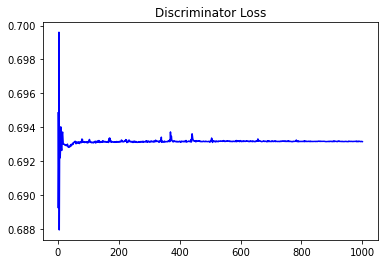

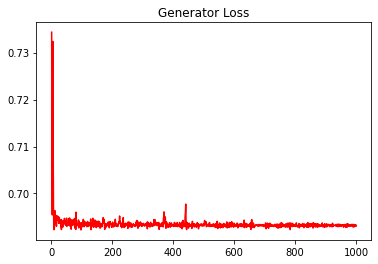

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13813288369348628


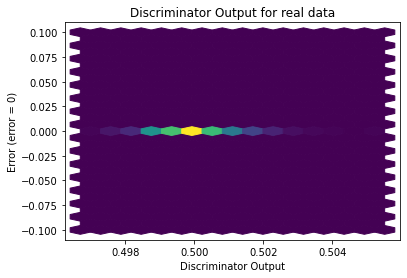

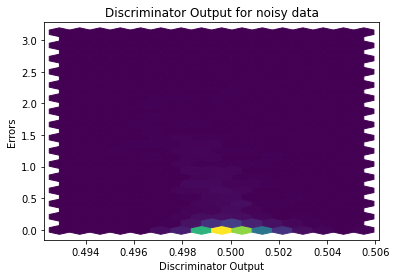

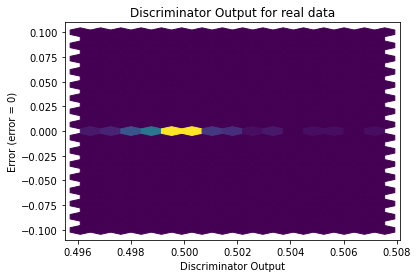

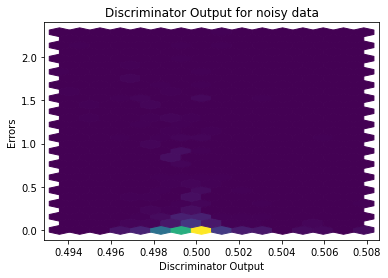

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


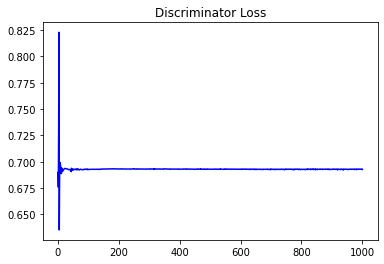

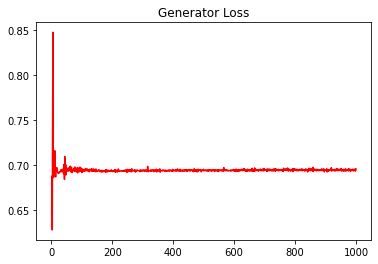

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15137620929706816


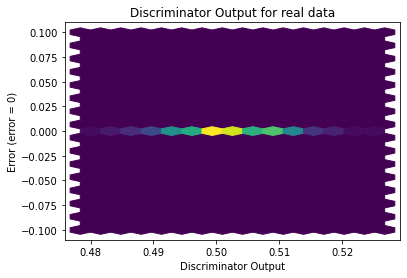

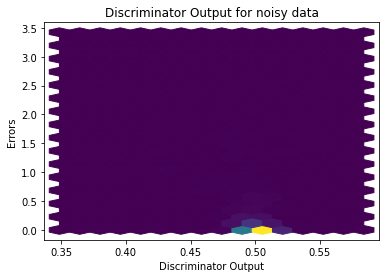

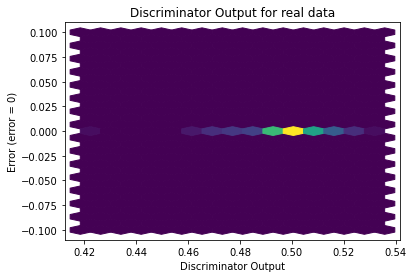

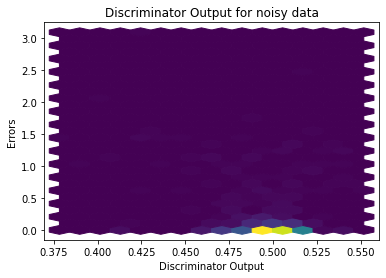

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1146]], requires_grad=True)
